In [85]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [149]:
df=pd.read_csv('Data/df_bp1.csv')

/tmp/ipykernel_138973/478500312.py:1: DtypeWarning: Columns (13,14,15,85,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Data/df_bp1.csv')


In [87]:
df.dtypes

date                      int64
dblheader_code            int64
day_of_week              object
team_v                   object
league_v                 object
game_no_v                 int64
team_h                   object
league_h                 object
game_no_h                 int64
runs_v                    int64
runs_h                    int64
outs_total                int64
day_night                object
completion_info          object
forfeit_info             object
protest_info             object
ballpark_id              object
attendance              float64
game_minutes              int64
linescore_v              object
linescore_h              object
AB_v                      int64
H_v                       int64
2B_v                      int64
3B_v                      int64
HR_v                      int64
RBI_v                     int64
SH_v                      int64
SF_v                      int64
HBP_v                     int64
BB_v                      int64
IBB_v   

In [150]:
df

,date,dblheader_code,day_of_week,team_v,league_v,game_no_v,team_h,league_h,game_no_h,runs_v,runs_h,outs_total,day_night,completion_info,forfeit_info,protest_info,ballpark_id,attendance,game_minutes,linescore_v,linescore_h,AB_v,H_v,2B_v,3B_v,HR_v,RBI_v,SH_v,SF_v,HBP_v,BB_v,IBB_v,SO_v,SB_v,CS_v,GIDP_v,CI_v,LOB_v,P_num_v,ERind_v,ERteam_v,WP_v,balk_v,PO_v,ASST_v,ERR_v,PB_v,DP_v,TP_v,AB_h,H_h,2B_h,3B_h,HR_h,RBI_h,SH_h,SF_h,HBP_h,BB_h,IBB_h,SO_h,SB_h,CS_h,GIDP_h,CI_h,LOB_h,P_num_h,ERind_h,ERteam_h,WP_h,balk_h,PO_h,ASST_h,ERR_h,PB_h,DP_h,TP_h,ump_HB_id,ump_HB_name,ump_1B_id,ump_1B_name,ump_2B_id,ump_2B_name,ump_3B_id,ump_3B_name,ump_LF_id,ump_LF_name,ump_RF_id,ump_RF_name,mgr_id_v,mgr_name_v,mgr_id_h,mgr_name_h,pitcher_id_w,pitcher_name_w,pitcher_id_l,pitcher_name_l,pitcher_id_s,pitcher_name_s,GWRBI_id,GWRBI_name,pitcher_start_id_v,pitcher_start_name_v,pitcher_start_id_h,pitcher_start_name_h,batter1_name_v,batter1_id_v,batter1_pos_v,batter2_name_v,batter2_id_v,batter2_pos_v,batter3_name_v,batter3_id_v,batter3_pos_v,batter4_name_v,batter4_id_v,batter4_pos_v,batter5_name_v,batter5_id_v,batter5_pos_v,batter6_name_v,batter6_id_v,batter6_pos_v,batter7_name_v,batter7_id_v,batter7_pos_v,batter8_name_v,batter8_id_v,batter8_pos_v,batter9_name_v,batter9_id_v,batter9_pos_v,batter1_name_h,batter1_id_h,batter1_pos_h,batter2_name_h,batter2_id_h,batter2_pos_h,batter3_name_h,batter3_id_h,batter3_pos_h,batter4_name_h,batter4_id_h,batter4_pos_h,batter5_name_h,batter5_id_h,batter5_pos_h,batter6_name_h,batter6_id_h,batter6_pos_h,batter7_name_h,batter7_id_h,batter7_pos_h,batter8_name_h,batter8_id_h,batter8_pos_h,batter9_name_h,batter9_id_h,batter9_pos_h,misc_info,acqui_info,season,run_diff,home_victory,run_total,date_dblhead,BATAVG_162_h,BATAVG_162_v,OBP_162_h,OBP_162_v,SLG_162_h,SLG_162_v,OBS_162_h,OBS_162_v,SB_162_h,SB_162_v,CS_162_h,CS_162_v,ERR_162_h,ERR_162_v,BATAVG_30_h,BATAVG_30_v,OBP_30_h,OBP_30_v,SLG_30_h,SLG_30_v,OBS_30_h,OBS_30_v,SB_30_h,SB_30_v,CS_30_h,CS_30_v,ERR_30_h,ERR_30_v
0,19800409,0,Wed,TOR,AL,1,SEA,AL,1,6,8,51,N,NaN,NaN,NaN,SEA02,22588.0,154,200001030,41010020x,36,9,1,1,2,5,0,0,0,5,0,4,2,0,1,0,8,5,6,6,0,0,24,14,1,0,1,0,34,12,2,1,1,8,2,0,0,2,1,4,0,0,1,0,6,3,6,6,0,0,27,16,2,1,1,0,barnl901,Larry Barnett,evanj901,Jim Evans,mckej901,Jim McKean,hendt901,Ted Hendry,NaN,(none),NaN,(none),mattb101,Bobby Mattick,johnd106,Darrell Johnson,parrm101,Mike Parrott,lemad101,Dave Lemanczyk,heavd101,Dave Heaverlo,cox-t101,Ted Cox,lemad101,Dave Lemanczyk,parrm101,Mike Parrott,grifa001,Alfredo Griffin,6,bailb001,Bob Bailor,9,maybj101,John Mayberry,3,veleo101,Otto Velez,10,hower001,Roy Howell,5,bonnb001,Barry Bonnell,7,boser101,Rick Bosetti,8,garcd001,Damaso Garcia,4,white002,Ernie Whitt,2,cruzj002,Julio Cruz,4,crair001,Rod Craig,8,meyed001,Dan Meyer,7,bochb001,Bruce Bochte,3,hortw101,Willie Horton,10,simpj101,Joe Simpson,9,cox-t101,Ted Cox,5,stinb101,Bob Stinson,2,mendm101,Mario Mendoza,6,NaN,Y,1980,2,1,14,198004090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19800409,0,Wed,ATL,NL,1,CIN,NL,1,0,9,51,D,NaN,NaN,NaN,CIN08,51774.0,127,000000000,42200010x,30,3,0,0,0,0,0,0,0,0,0,5,0,0,0,0,3,5,6,6,1,0,24,10,2,1,1,0,33,9,3,1,1,9,1,1,0,5,1,6,0,0,1,0,7,1,0,0,0,0,27,11,0,0,0,0,wendh901,Harry Wendelstedt,pullf901,Frank Pulli,monte901,Ed Montague,harrl901,Lanny Harris,NaN,(none),NaN,(none),cox-b103,Bobby Cox,mcnaj801,John McNamara,pastf001,Frank Pastore,niekp001,Phil Niekro,NaN,(none),fostg001,George Foster,niekp001,Phil Niekro,pastf001,Frank Pastore,mille001,Eddie Miller,8,roysj001,Jerry Royster,4,mattg001,Gary Matthews,9,hornb001,Bob Horner,5,chamc001,Chris Chambliss,3,murpd001,Dale Murphy,7,pocob001,Biff Pocoroba,2,gomel101,Luis Gomez,6,niekp001,Phil Niekro,1,colld001,Dave Collins,8,grifk001,Ken Griffey,9,concd001,Dave Concepcion,6,fostg001,George Foster,7,dried001,Dan Driessen,3,bencj101,Johnny Bench,2,knigr001,Ray Knight,5,kennj101,Junior Kennedy,4,pastf001,Frank Pastore,1,NaN,Y,1980,9,1,9,1980

In [151]:
len(df[df["OBS_162_h"].isnull()])

2677

In [152]:
df = df.dropna(subset=['OBP_162_h','OBP_162_v',
            'SLG_162_h','SLG_162_v', 'BATAVG_30_h', 'BATAVG_30_v'])

In [153]:
len(df[df["OBS_162_h"].isnull()])

0

In [154]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=1000, min_samples_split=10, random_state=1)

In [155]:
train = df[df["date"] < 20210101]
test = df[df["date"] > 20210101]

In [156]:
predictors = ['OBP_162_h','OBP_162_v',
            'SLG_162_h','SLG_162_v','BATAVG_30_h', 'BATAVG_30_v']

In [127]:
rf.fit(train[predictors], train["home_victory"])

RandomForestClassifier(min_samples_split=10, n_estimators=1000, random_state=1)

In [128]:
preds = rf.predict(test[predictors])

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

error = accuracy_score(test["home_victory"], preds)
error

0.5346779172669274

In [129]:
combined = pd.DataFrame(dict(actual=test["home_victory"], predicted=preds))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,914,1340
1,921,1684


In [130]:
#When we predicted a win, what % of time did team actually win
precision_score(test["home_victory"], preds)

0.5568783068783069

In [157]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [158]:
model = LogisticRegression(solver='liblinear', C=10.0, random_state=42)

In [159]:
model.fit(train[predictors], train["home_victory"])

LogisticRegression(C=10.0, random_state=42, solver='liblinear')

In [160]:
model.intercept_

array([0.08986192])

In [161]:
model.predict_proba(test[predictors])

array([[0.43684808, 0.56315192],
       [0.45446551, 0.54553449],
       [0.49609947, 0.50390053],
       ...,
       [0.51794454, 0.48205546],
       [0.39547251, 0.60452749],
       [0.51684965, 0.48315035]])

In [162]:
model.predict(test[predictors])

array([1, 1, 1, ..., 0, 1, 0])

In [163]:
model.score(test[predictors], test["home_victory"])

0.5521712286478699

In [164]:
cm = confusion_matrix(test["home_victory"], model.predict(test[predictors]))

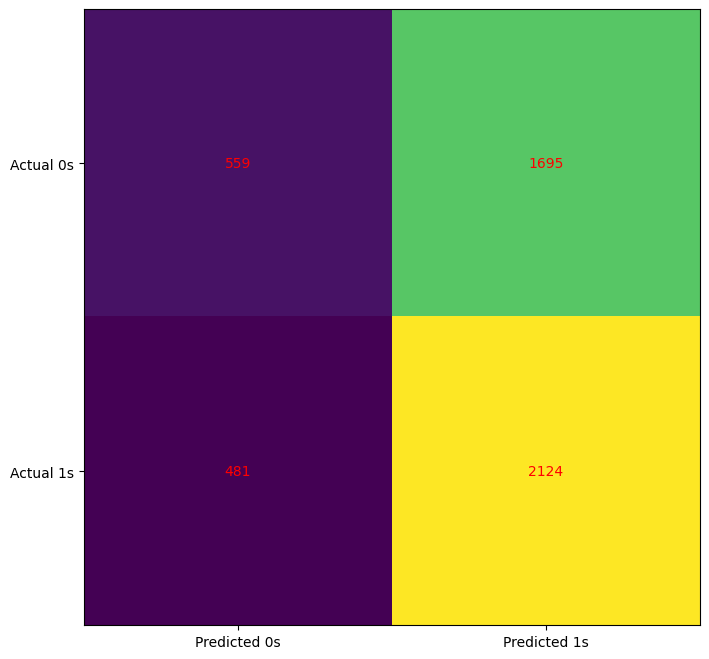

In [165]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()